### SubplotsContainer (SContainer) object

Manage multiple axes within the same figure, using gridspec. ```SContainer``` allows you to both create complexe figure containing various graph types or similar plot with ease.
SContainer has two complementary aims :
- Produce custom graph based on `gridspec` index
- Automaticaly produce similar graph based on hue values

`SContainer` takes 3 mandatory argument : A dataframe, the number of row and the number of cols
After that, accessing to a graph is done using the gridspec index. This index can be either a singler integer corresponding to the flatten grid indexs or a tuple of (nrow, ncol). For the second, slice can be given.

In [1]:
from seahorse import SContainer
from seahorse import gwrap, constants

constants.SHOWMODE = True

df = gwrap.sns.load_dataset("tips")

sc = SContainer(df, 1, 2)
sc.graph(0).sns.regplot("total_bill", "tip", fit_reg=False)
sc.graph(1).sns.barplot("sex", "tip")
sc.show()

Matplotlib venn package not found (optional)
Download command line : pip install matplotlib-venn


<Figure size 2000x1125 with 3 Axes>

As said, the index can also be a tuple of two value, containing or not slices.

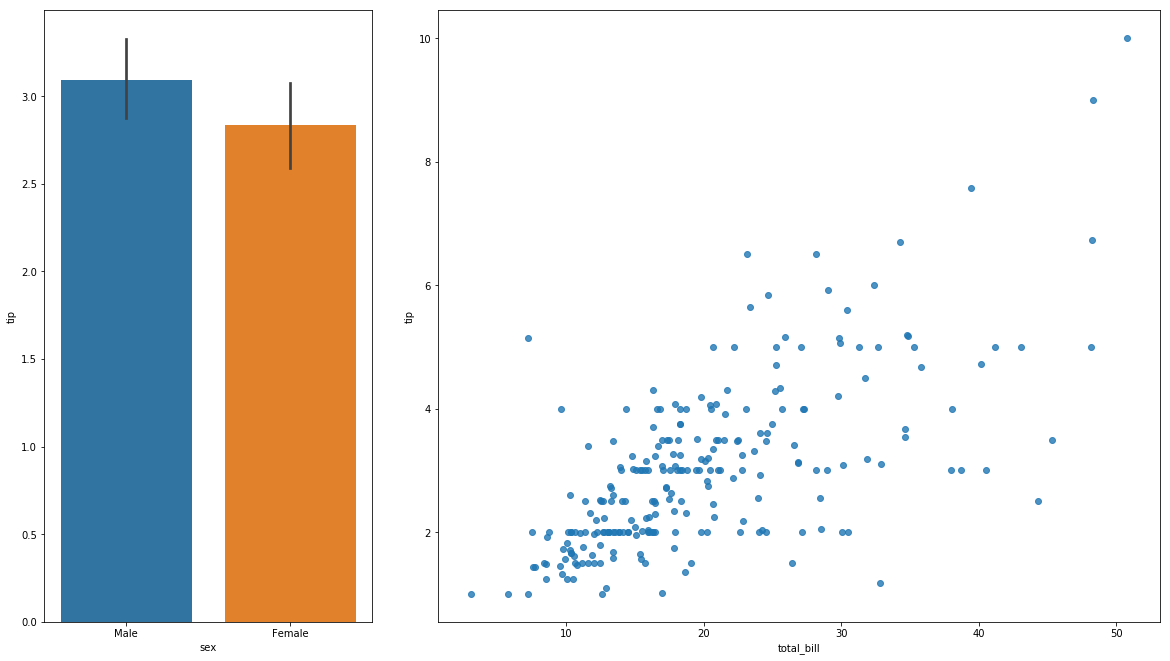

In [2]:
sc = SContainer(df, 1, 3)
sc.graph(0).sns.barplot("sex", "tip")
sc.graph((0, slice(1, 3))).sns.regplot("total_bill", "tip", fit_reg=False)
sc.show()

By default, seahorse raises an error if two graph with overlapping index are given

Exception: The current index overlapp a previous index

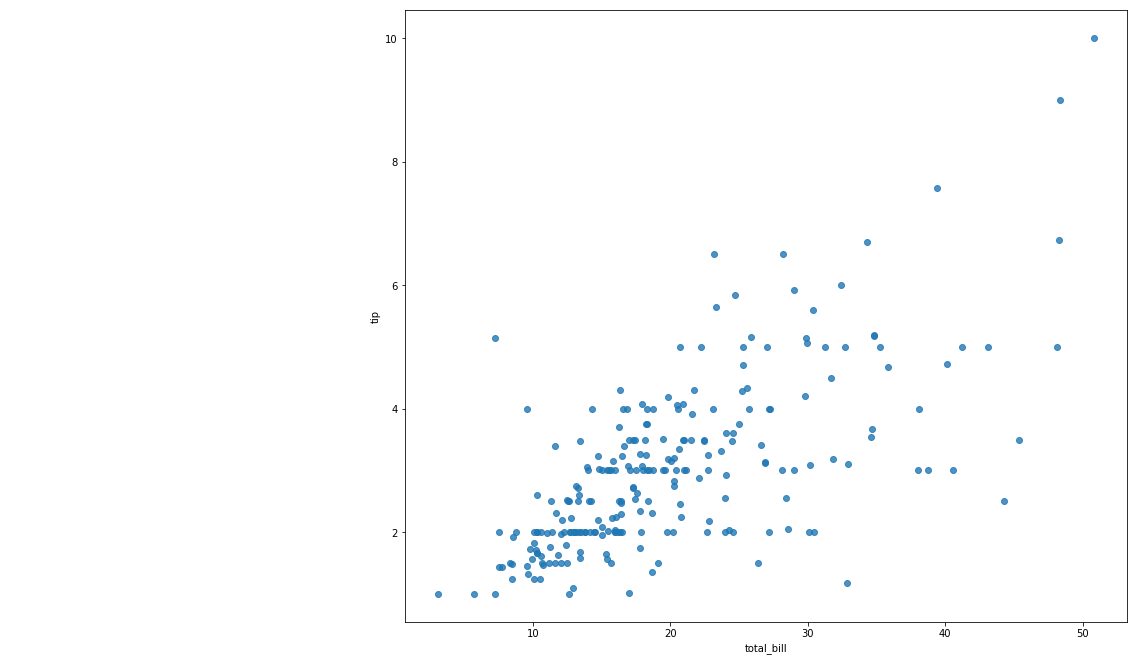

In [3]:
sc = SContainer(df, 1, 3)
sc.graph((0, slice(1, 3))).sns.regplot("total_bill", "tip", fit_reg=False)
sc.graph(1).sns.barplot("sex", "tip")

Several ```GridSpec``` instances can be instancied and linked to the graph. The first one is called ```base``` but the new ones can be accessed easily using ```getitem```

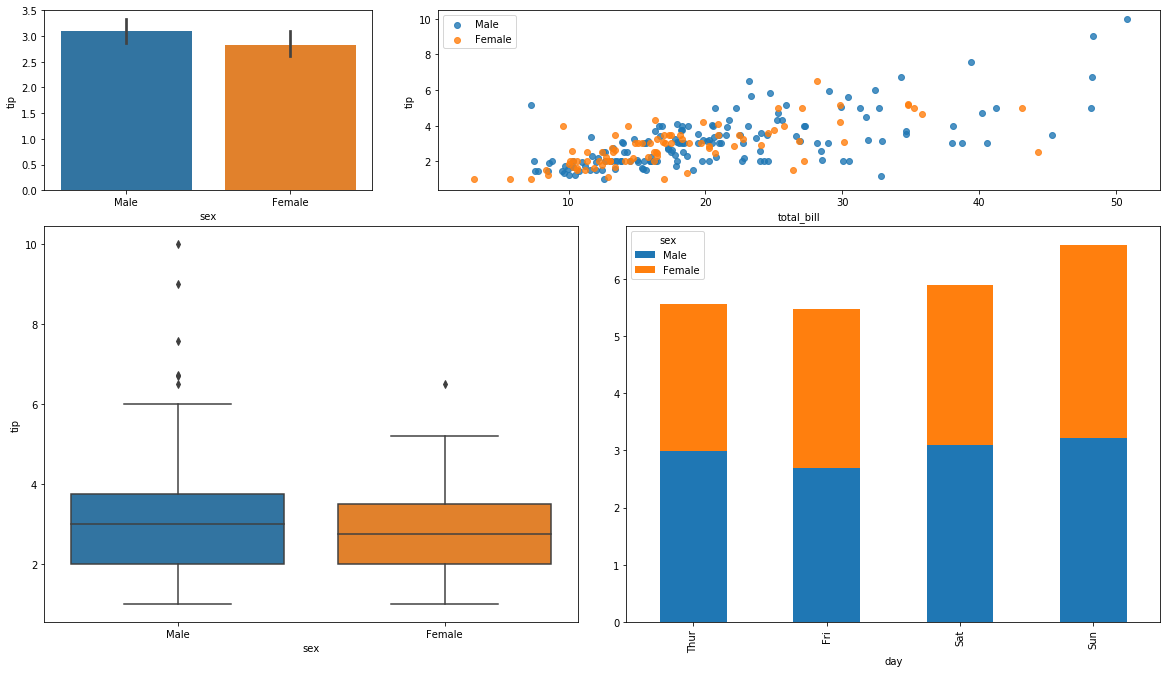

In [4]:
sc = SContainer(df, 3, 3)
sc.add_gs("top", 3, 4)

sc.graph((0, 0)).sns.barplot("sex", "tip")
sc.graph((0, slice(1, 3))).shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex")

sc["top"].graph((slice(1, 3), slice(0, 2))).sns.boxplot("sex", "tip")
sc["top"].graph((slice(1, 3), slice(2, 4))).shs.stacked_barplot("day", "tip", "sex")
sc.show()

### Groupby method

The ```groupby``` method allows you to quickly create similar graphs

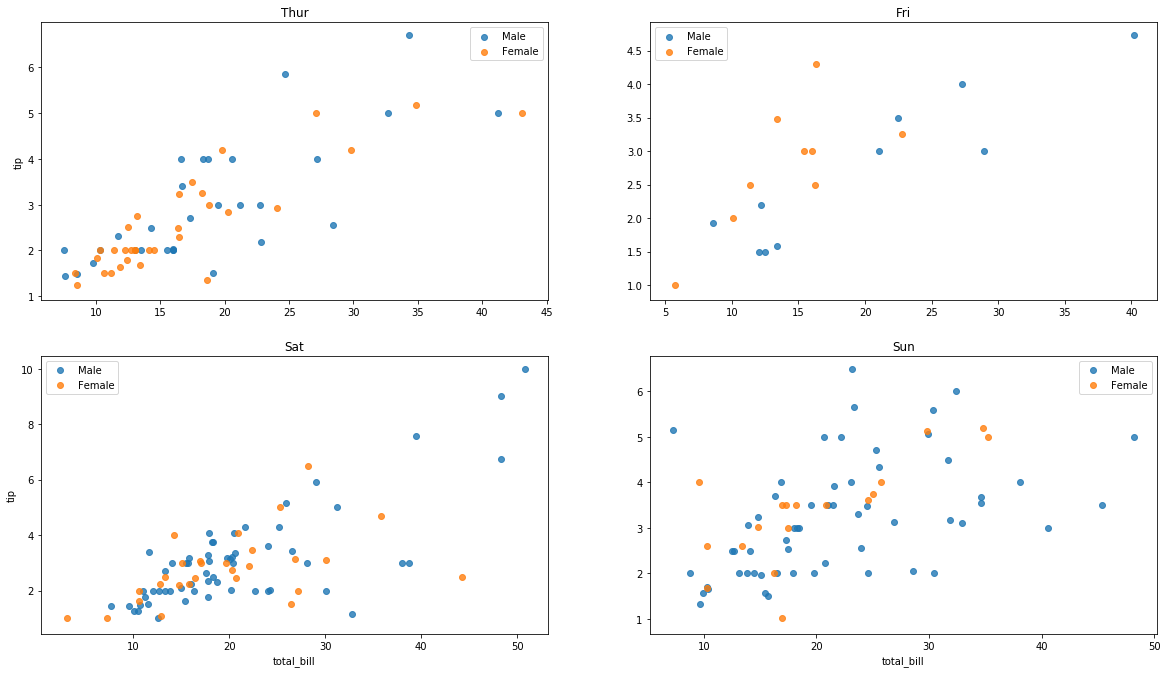

In [5]:
sc = SContainer(df, 2, 2)
sc.groupby("day").shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex")
sc.show()

Several methods are provided. For example if you want to rename your labels and share the x and y axis

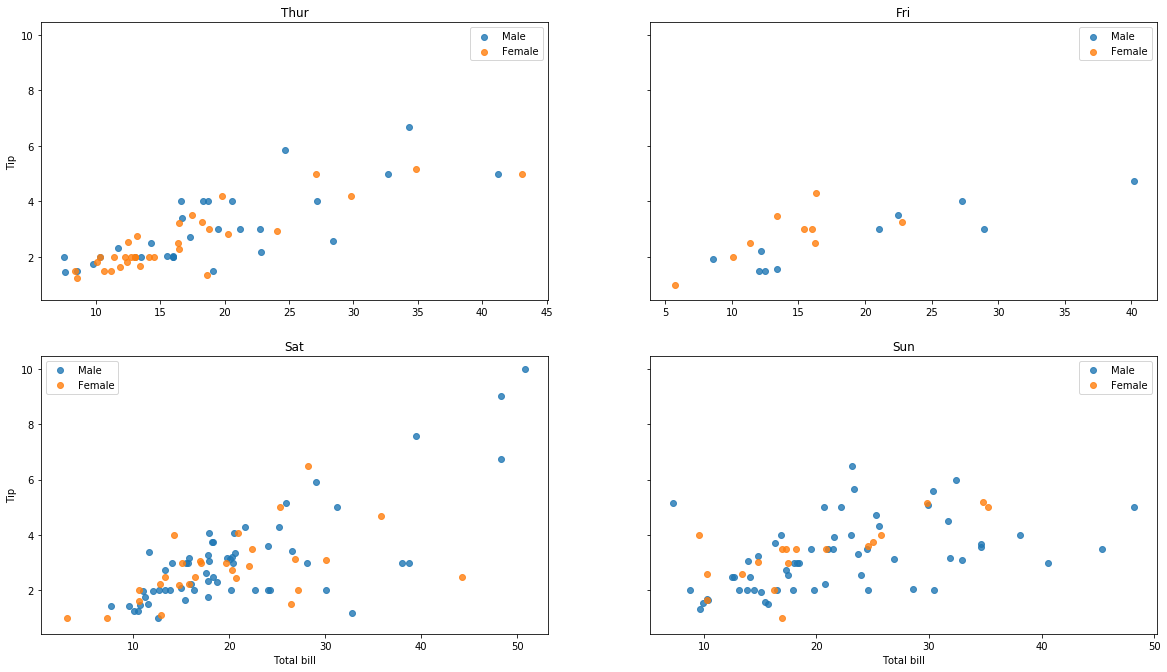

In [6]:
sc = SContainer(df, 2, 2)
sc.groupby("day").shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex")
sc.sharey()
sc.set_labels("Total bill", "Tip")